From Quiz - Data Transformation in Python

In [36]:
import pandas as pd

In [37]:
data = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [24, 30, 35, 29],
    'Score': [85, 90, 88, 92]
})

In [40]:
# Question: Which of the following filters rows where Age is greater than 30?
data[data["Age"]>30]

,Name,Age,Score
2,Charlie,35,88


In [41]:
data.loc[data["Age"]>30]

,Name,Age,Score
2,Charlie,35,88


In [48]:
# data.query("Age">30)  <--  this throw error STR > INT
data.query("Age > 30")  # <-- this way it works

,Name,Age,Score
2,Charlie,35,88


In [ ]:
# Question: Which code selects only the Name and Score columns?

In [49]:
data[["Name", "Score"]]

,Name,Score
0,Alice,85
1,Bob,90
2,Charlie,88
3,David,92


In [52]:
data.loc[:,["Name","Score"]]   # means [all rows, [this columns]]  for all rows used ':'

,Name,Score
0,Alice,85
1,Bob,90
2,Charlie,88
3,David,92


In [56]:
data.loc[[1],["Name","Score"]] # for example

,Name,Score
1,Bob,90


In [54]:
data.iloc[:,[0,2]]

,Name,Score
0,Alice,85
1,Bob,90
2,Charlie,88
3,David,92


In [58]:
# You are given a DataFrame.
n_data = pd.DataFrame({ 'Name': ['Alice', 'Bob', 'Charlie', 'David'], 'Score': [85, None, 88, 92] })
n_data

,Name,Score
0,Alice,85.0
1,Bob,NaN
2,Charlie,88.0
3,David,92.0


In [ ]:
# Question: Which code calculates the sum of Score across all rows?

In [59]:
data["Score"].sum()

np.int64(355)

In [60]:
data.loc[:,["Score"]].sum()

Score    355
dtype: int64

In [62]:
sum(data["Score"])

355

In [ ]:
# Question: How can you add a new column called Age_Group where values are 'Youth' if Age < 30, otherwise 'Adult'?

In [65]:
data["Age_Group_A"] = ['Youth' if age < 30 else 'Adult' for age in data['Age']]
data

,Name,Age,Score,Age_Group
0,Alice,24,85,Youth
1,Bob,30,90,Adult
2,Charlie,35,88,Adult
3,David,29,92,Youth


In [66]:
data["Age_Group_B"] = data["Age"].apply(lambda age: 'Youth' if age < 30 else 'Adult')
data

,Name,Age,Score,Age_Group,Age_Group_B
0,Alice,24,85,Youth,Youth
1,Bob,30,90,Adult,Adult
2,Charlie,35,88,Adult,Adult
3,David,29,92,Youth,Youth


In [69]:
data["Age_Group_C"] = data.apply(lambda raw: 'Youth' if raw['Age'] < 30 else 'Adult', axis=1)
data

,Name,Age,Score,Age_Group,Age_Group_B,Age_Group_C
0,Alice,24,85,Youth,Youth,Youth
1,Bob,30,90,Adult,Adult,Adult
2,Charlie,35,88,Adult,Adult,Adult
3,David,29,92,Youth,Youth,Youth


In [ ]:
# Question: Which code sorts the rows in descending order of Score?

In [70]:
data.sort_values(by="Score", ascending=False)

,Name,Age,Score,Age_Group,Age_Group_B,Age_Group_C
3,David,29,92,Youth,Youth,Youth
1,Bob,30,90,Adult,Adult,Adult
2,Charlie,35,88,Adult,Adult,Adult
0,Alice,24,85,Youth,Youth,Youth


In [72]:
data.loc[:, 'Score'].sort_values(ascending=False)

3    92
1    90
2    88
0    85
Name: Score, dtype: int64

In [88]:
# Question: Which code calculates the mean of Values grouped by Category?
cat_data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A'],
    'Values': [10, 20, 15, 25, 10]
})
cat_data

,Category,Values
0,A,10
1,B,20
2,A,15
3,B,25
4,A,10


In [89]:
cat_data.groupby("Category").mean()

,Values
Category,
A,11.666667
B,22.500000


In [92]:
cat_data.groupby(['Category']).agg('mean')

,Values
Category,
A,11.666667
B,22.500000


In [93]:
cat_data.groupby('Category')['Values'].mean()

Category
A    11.666667
B    22.500000
Name: Values, dtype: float64

In [105]:
# Question: Which code fills missing values in the Score column with 0?
temp_data = pd.DataFrame({ 'Name': ['Alice', 'Bob', 'Charlie', 'David'], 'Score': [85, None, 88, 92] })
temp_data

,Name,Score
0,Alice,85.0
1,Bob,NaN
2,Charlie,88.0
3,David,92.0


In [106]:
temp_data.fillna({'Score': 0})  # this works but not change in real data frame
temp_data

,Name,Score
0,Alice,85.0
1,Bob,NaN
2,Charlie,88.0
3,David,92.0


In [107]:
temp_data['Score'].fillna(0)  # this works but not change in real data frame
temp_data

,Name,Score
0,Alice,85.0
1,Bob,NaN
2,Charlie,88.0
3,David,92.0


In [108]:
temp_data['Score'] = temp_data['Score'].fillna(0) # this works and update in real data frame
temp_data

,Name,Score
0,Alice,85.0
1,Bob,0.0
2,Charlie,88.0
3,David,92.0


Explore the data

Based on the data that you gathered last week, perform the following tasks: 

Task 1:

Plot the distribution of happiness score per country.

Find 10 least happy countries.

What is the average of happiness?

What are the countries above the median

Plot the correlation between 2 pairs of variables

 



Task 2: 

Scrape the data from 2025 (same wiki page)

Repeat tasks 1 on the new data 

Do you see a significant difference between 2019 and 2025?  Explain


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_happiness_2019 = pd.read_csv("./assignment_support/happiness_2019_full_dataset.csv")
df_happiness_2019.head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,continent
0,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe


In [8]:
df_happiness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  153 non-null    object 
 1   happiness_score          153 non-null    float64
 2   gdp_per_capita           153 non-null    float64
 3   social_support           153 non-null    float64
 4   healthy_life_expectancy  153 non-null    float64
 5   freedom_life_choices     153 non-null    float64
 6   generosity               153 non-null    float64
 7   perceptions_corruption   153 non-null    float64
 8   continent                125 non-null    object 
dtypes: float64(7), object(2)
memory usage: 10.9+ KB


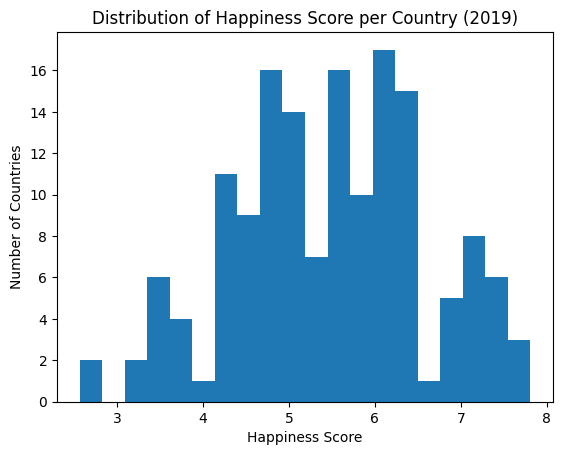

In [9]:
plt.figure()
plt.hist(df_happiness_2019["happiness_score"], bins=20)
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.title("Distribution of Happiness Score per Country (2019)")
plt.show()

In [17]:
df_happiness_2019.sort_values(by="happiness_score")[["happiness_score","country"]].head(5)

,happiness_score,country
152,2.567,Afghanistan
151,2.817,South Sudan
150,3.299,Zimbabwe
149,3.312,Rwanda
148,3.476,Central African Republic


In [22]:
df_happiness_2019["happiness_score"].mean().round(2)

np.float64(5.47)

In [28]:
median = df_happiness_2019["happiness_score"].median()
median

np.float64(5.515)

In [29]:
df_happiness_2019[df_happiness_2019["happiness_score"] > median].head()

,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_life_choices,generosity,perceptions_corruption,continent
0,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe


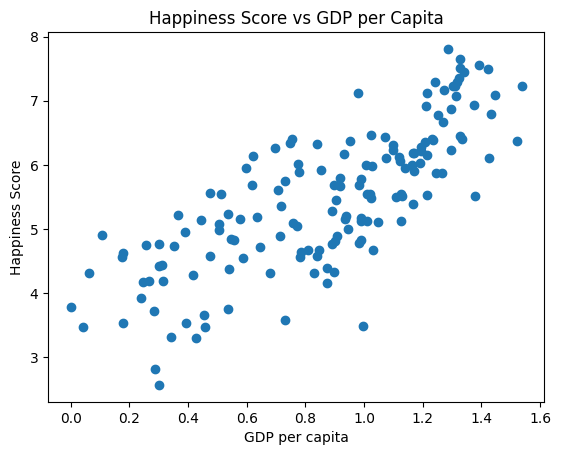

In [33]:
# Correlation 1: Happiness score vs GDP per capita

plt.figure()
plt.scatter(df_happiness_2019["gdp_per_capita"], df_happiness_2019["happiness_score"])
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs GDP per Capita")
plt.show()

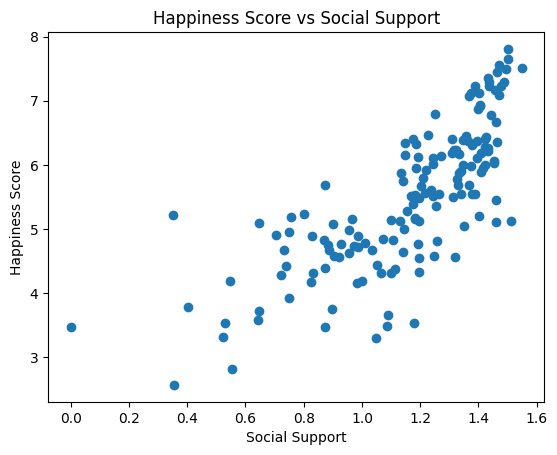

In [35]:
# Correlation 2: Happiness score vs Social support
plt.figure()
plt.scatter(df_happiness_2019["social_support"], df_happiness_2019["happiness_score"])
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.title("Happiness Score vs Social Support")
plt.show()

Task 2: 

Scrape the data from 2025 (same wiki page)

Repeat tasks 1 on the new data 

Do you see a significant difference between 2019 and 2025?  Explain

